In [1]:
import collections

collections.Iterable = collections.abc.Iterable

from deploy_model_instances import *
from data_handler import  *

Segmentation Models: using `keras` framework.


In [3]:
os.environ['CUDA_VISIBLE_DEVICES'] = '0'
model_input = data_load(
     "D:/pythonProjects/final_project/Final_project/app/data_utils/searches/2023-05-07_09-26-33.547604")

In [4]:
model = ModelDeployment(model_weights_path="best_model_efficientnetb4_4.h5")

In [5]:
len(model_input)

595

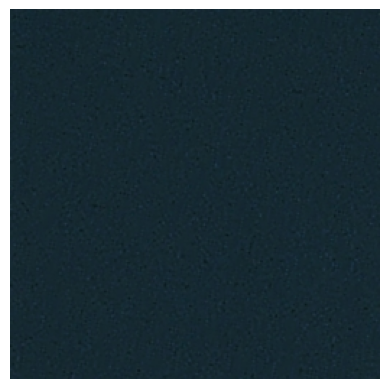

In [6]:
plt.imshow(model_input[560]["image"])
plt.axis('off')  # Turn off the axis labels
plt.show()

In [7]:
with tf.device('/GPU:0'):
    results_list = model.execute_job(input_data=model_input)

1/1 [==============================] - 0s 50ms/step


In [8]:
len(results_list)

595

tile_25_5.jpg


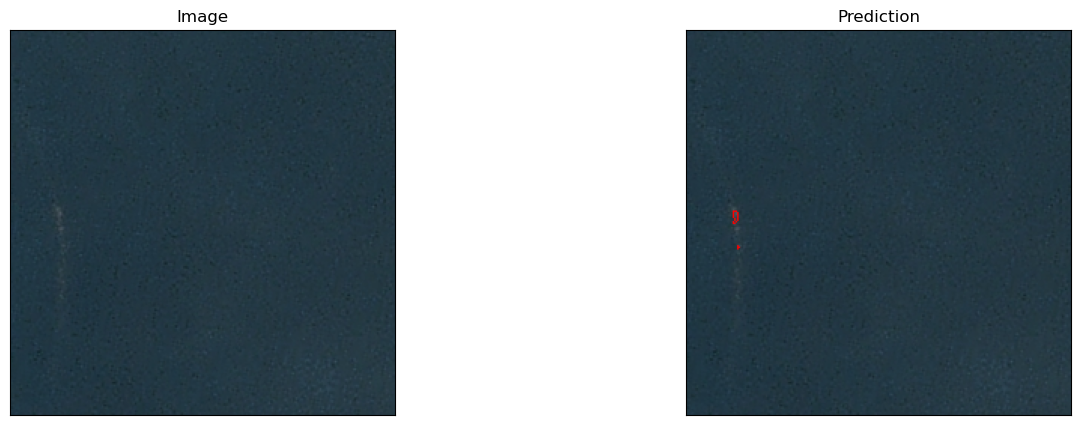

tile_25_6.jpg


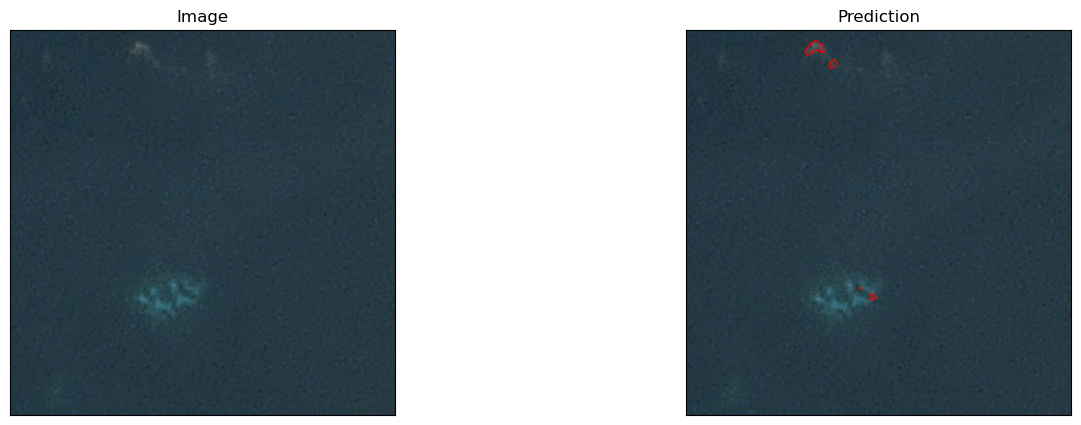

tile_30_8.jpg


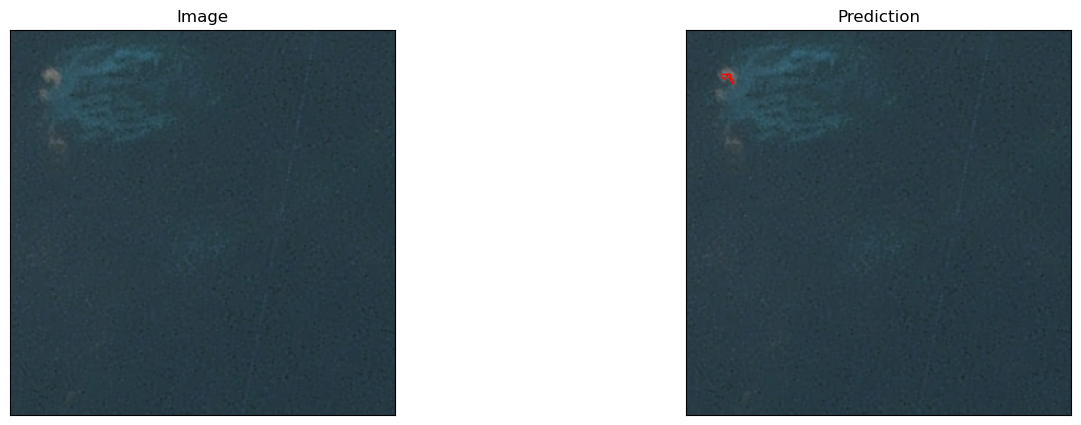

tile_31_10.jpg


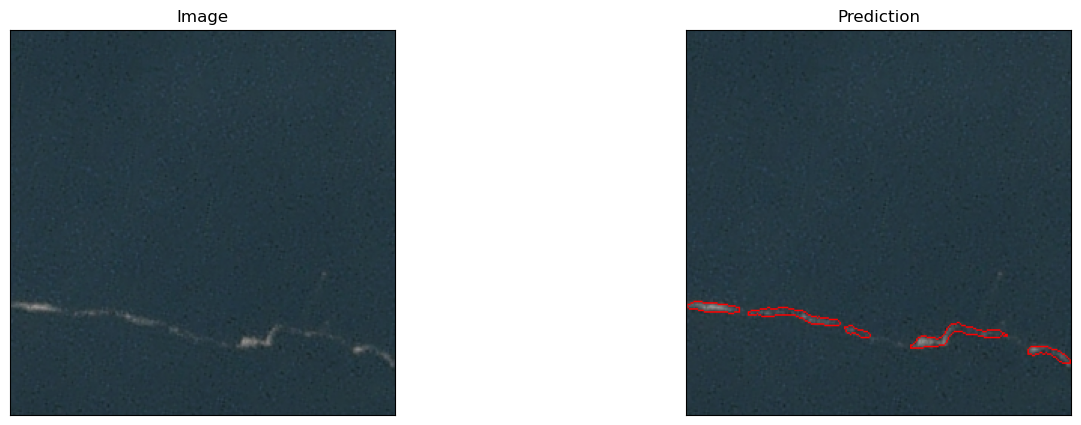

tile_26_5.jpg


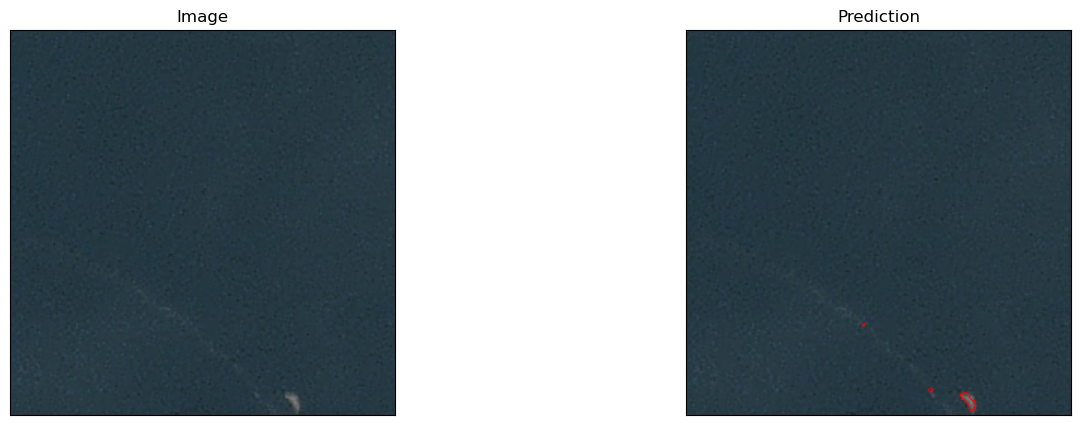

tile_26_6.jpg


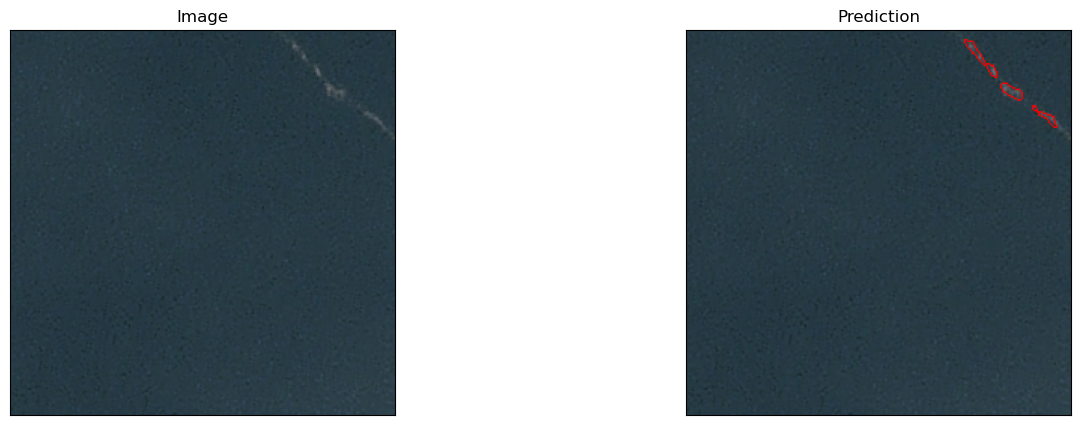

tile_31_5.jpg


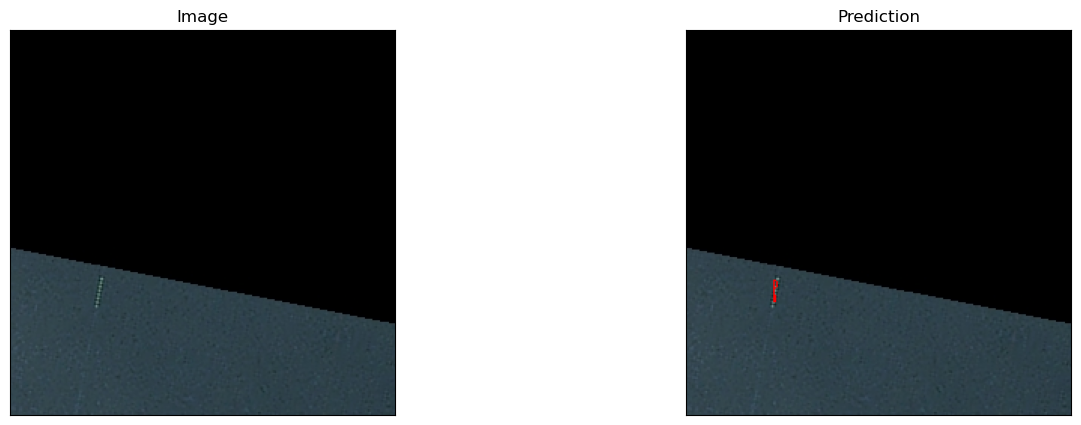

tile_31_6.jpg


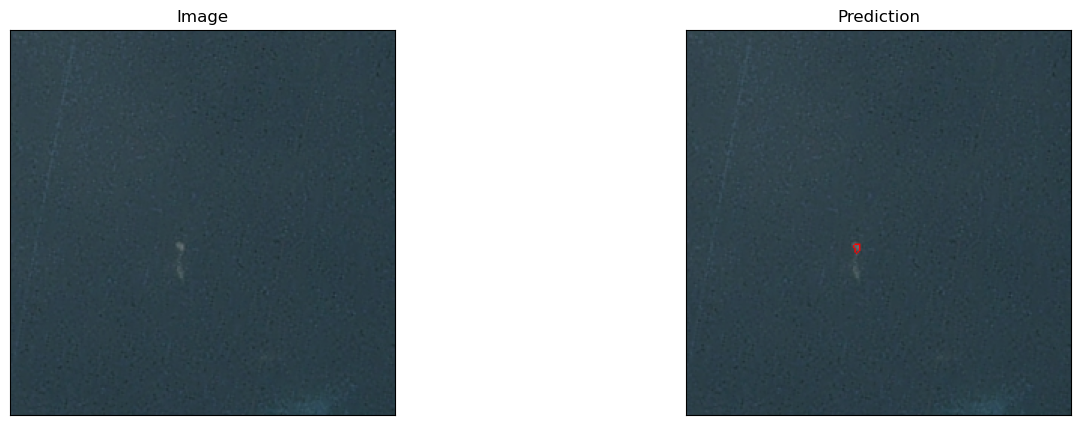

tile_32_10.jpg


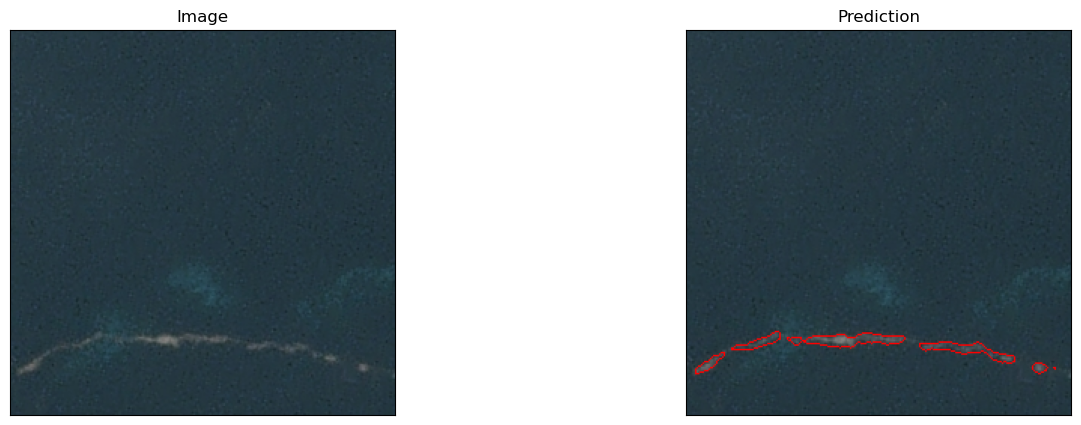

tile_27_6.jpg


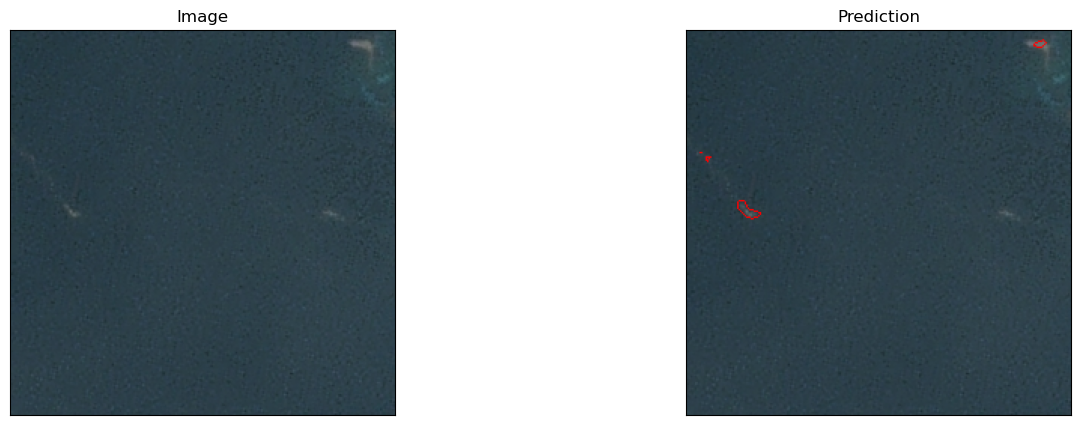

tile_6_2.jpg


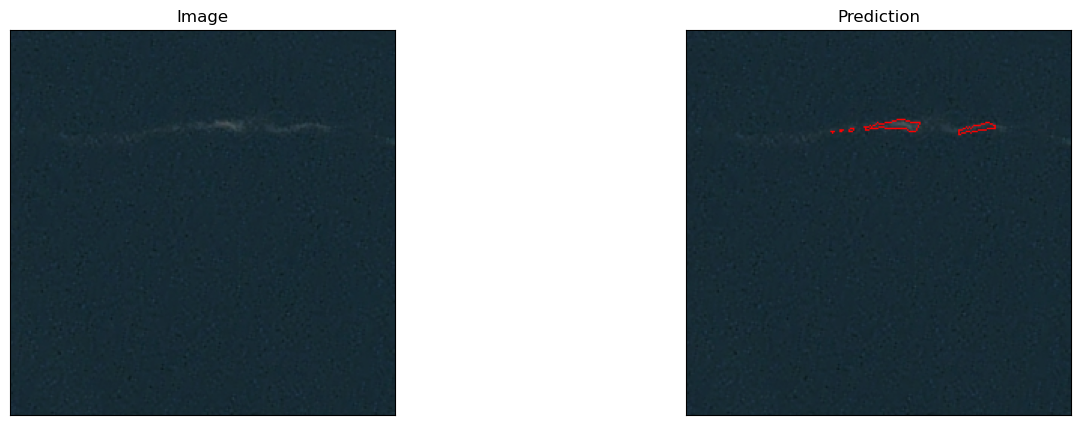

tile_32_8.jpg


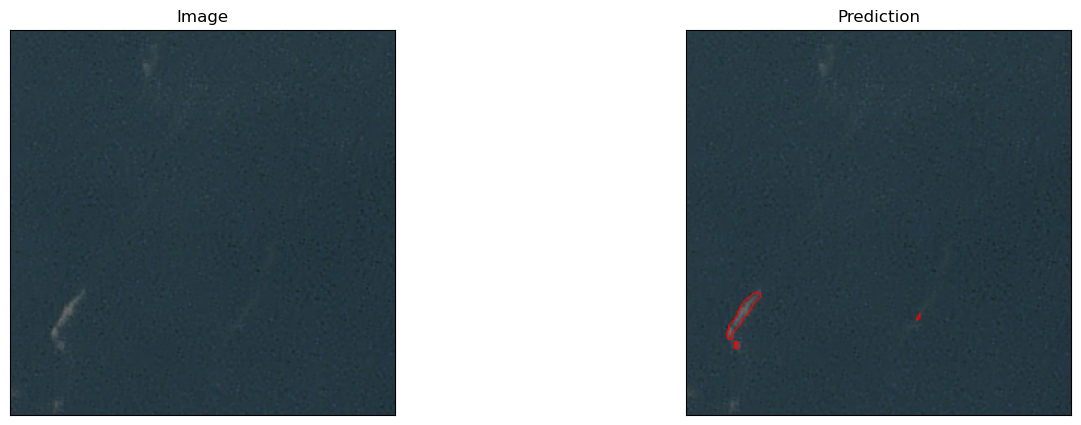

tile_28_10.jpg


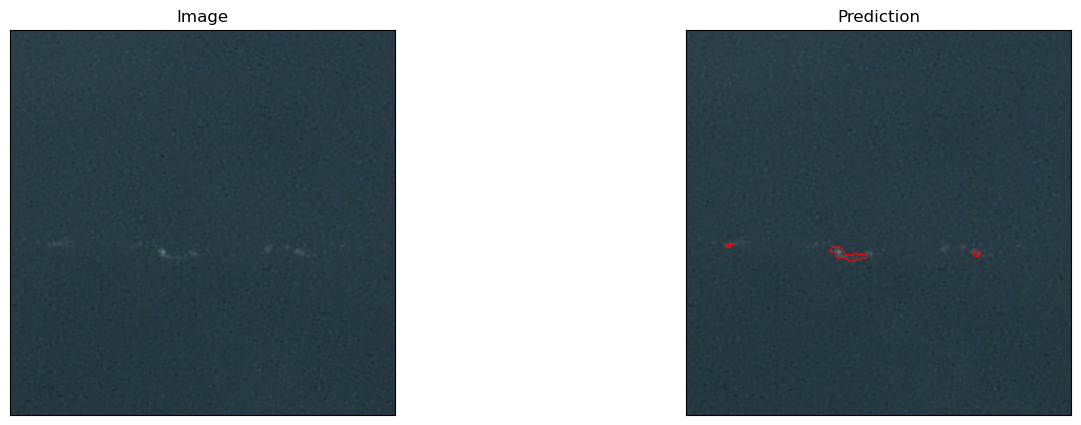

tile_33_10.jpg


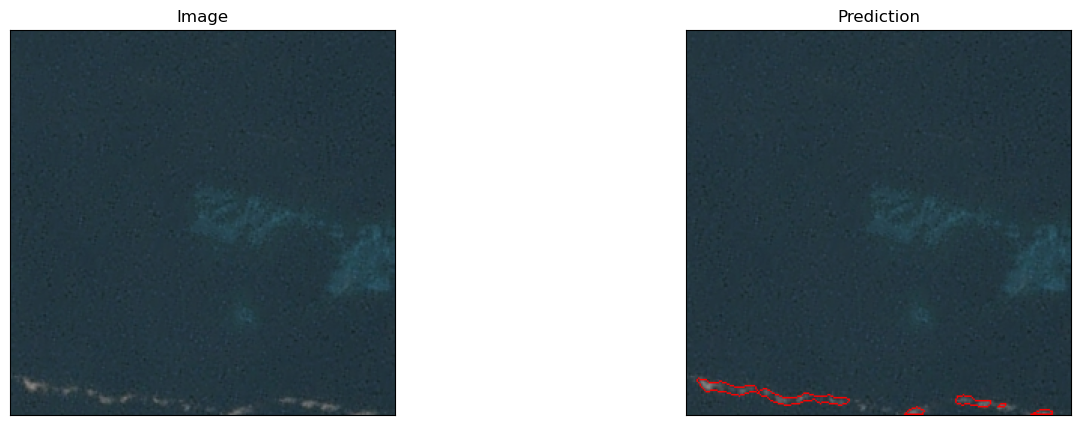

tile_33_11.jpg


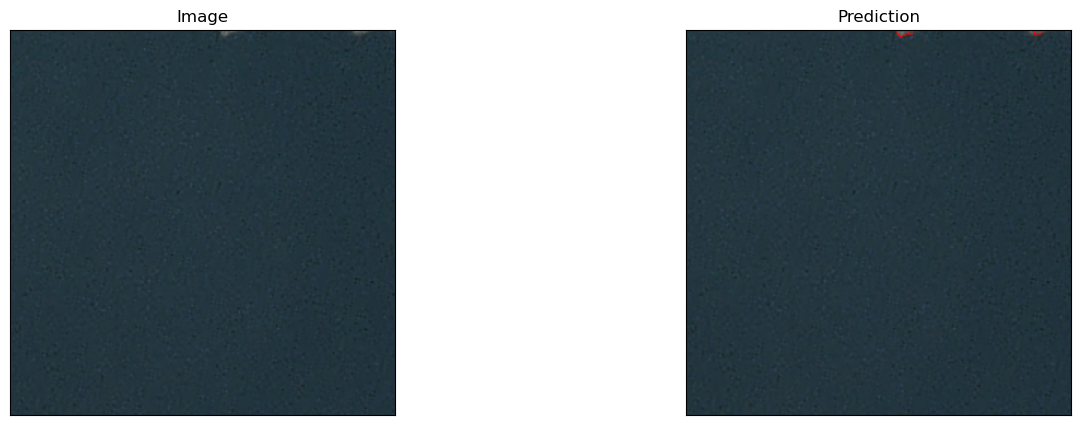

tile_22_4.jpg


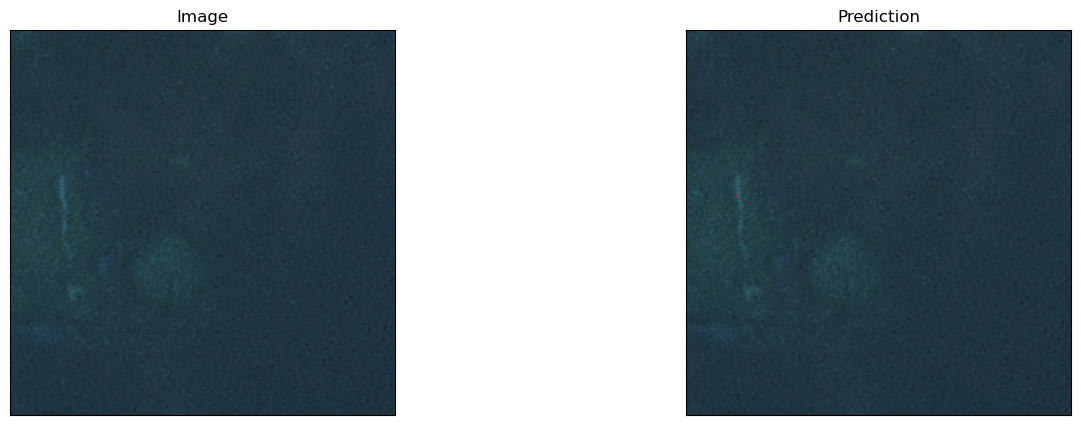

tile_22_6.jpg


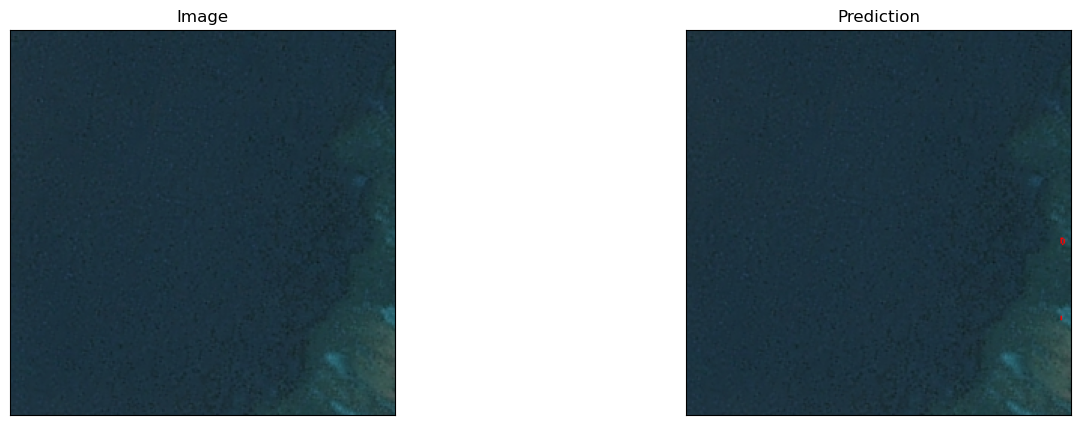

tile_22_7.jpg


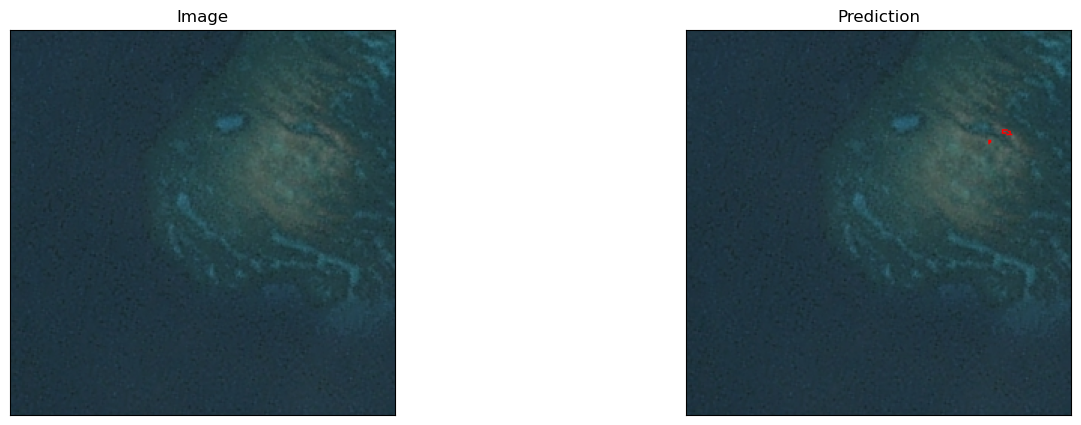

tile_28_7.jpg


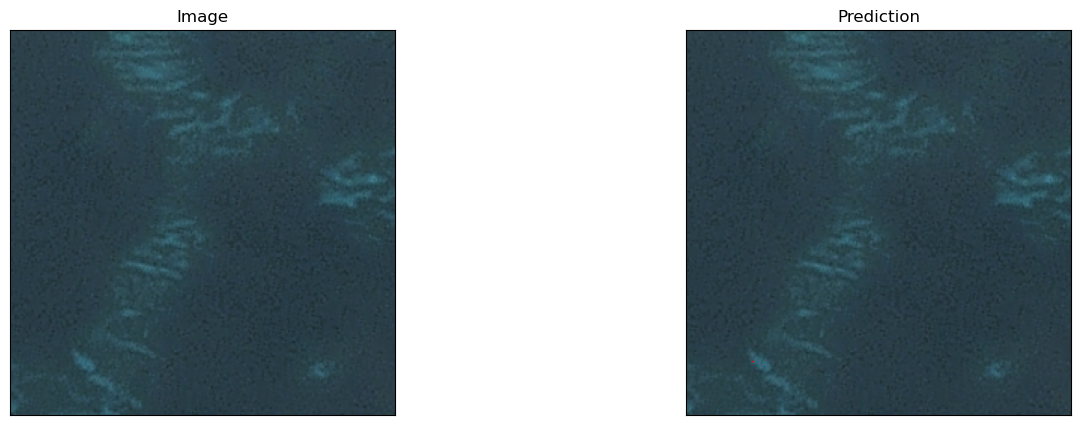

tile_33_7.jpg


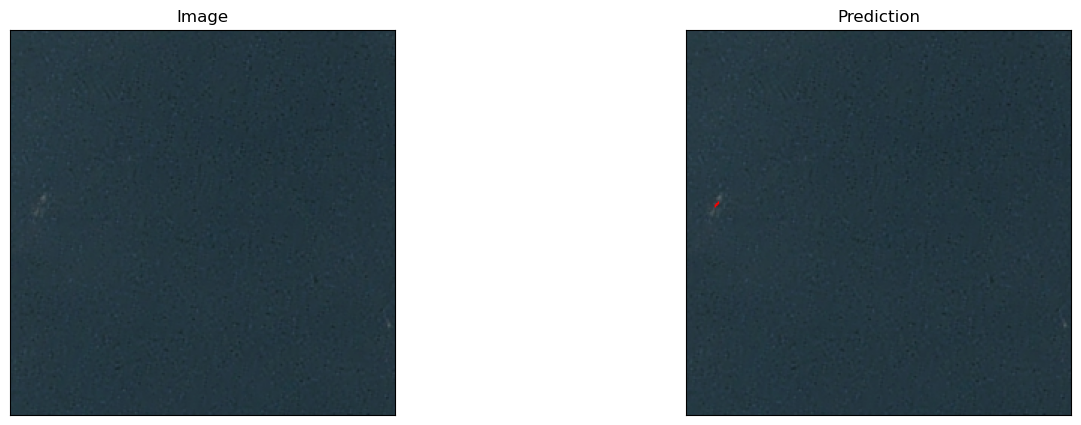

tile_7_2.jpg


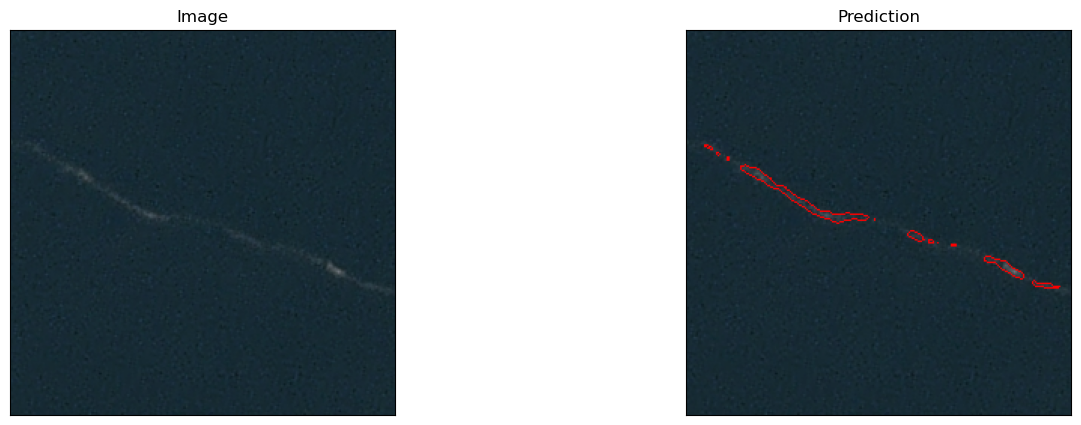

tile_29_10.jpg


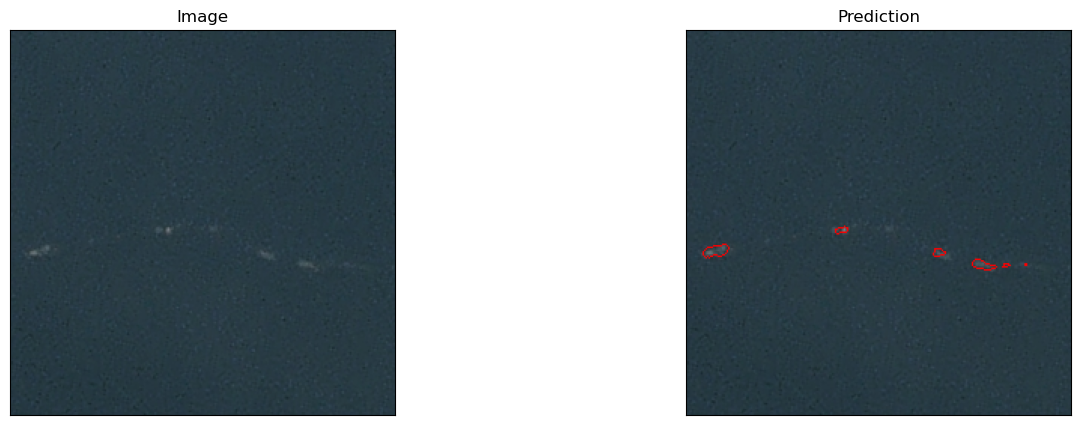

tile_12_8.jpg


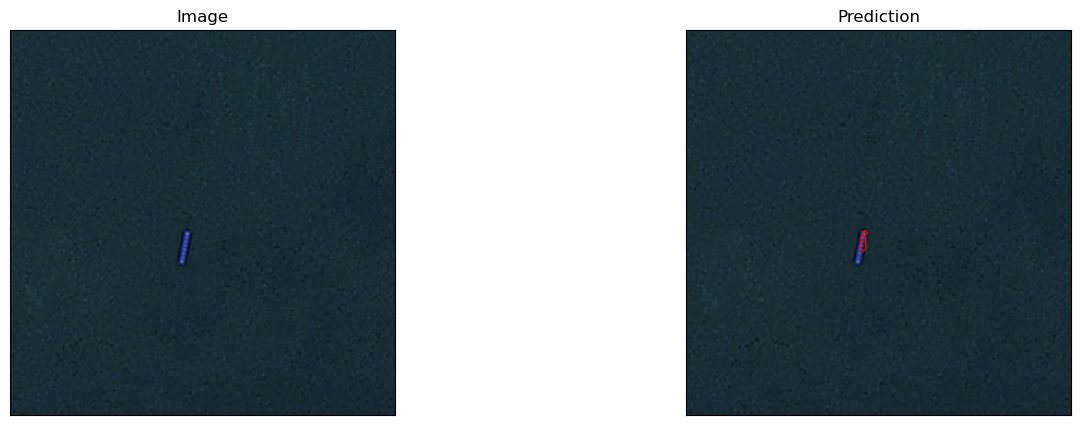

tile_29_15.jpg


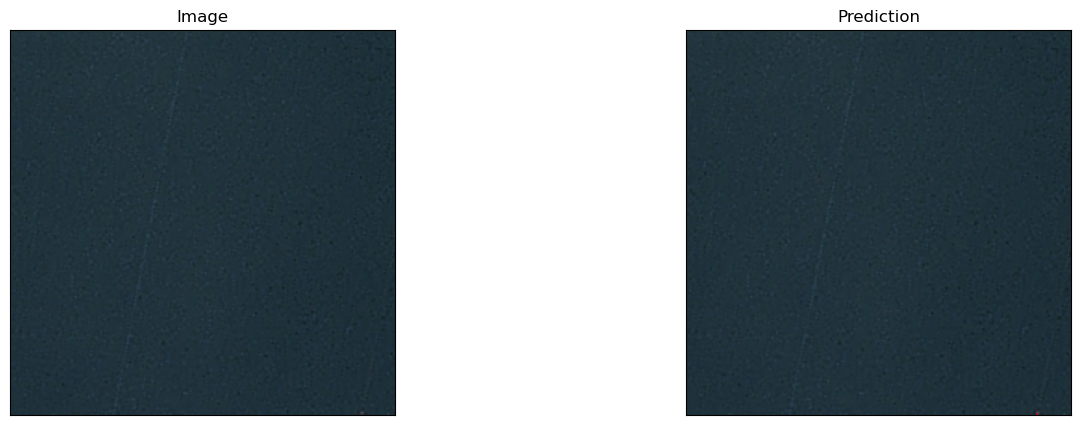

tile_34_11.jpg


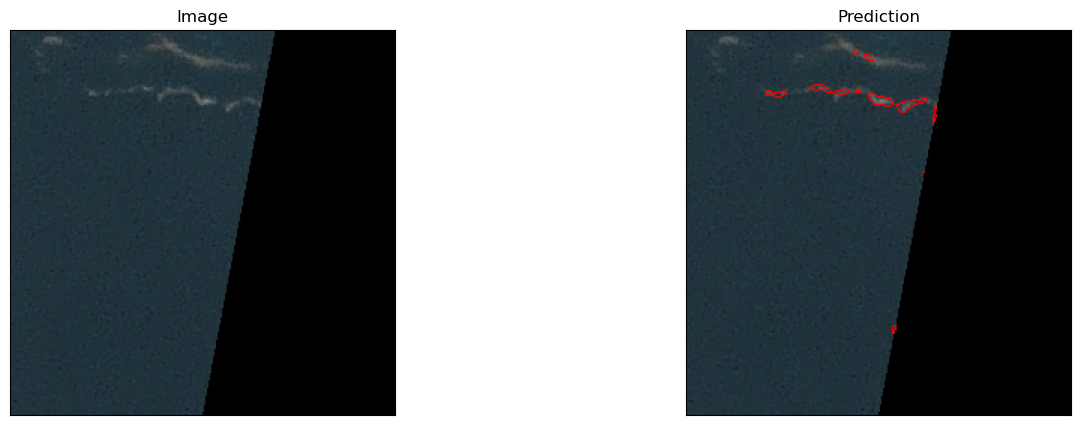

tile_29_16.jpg


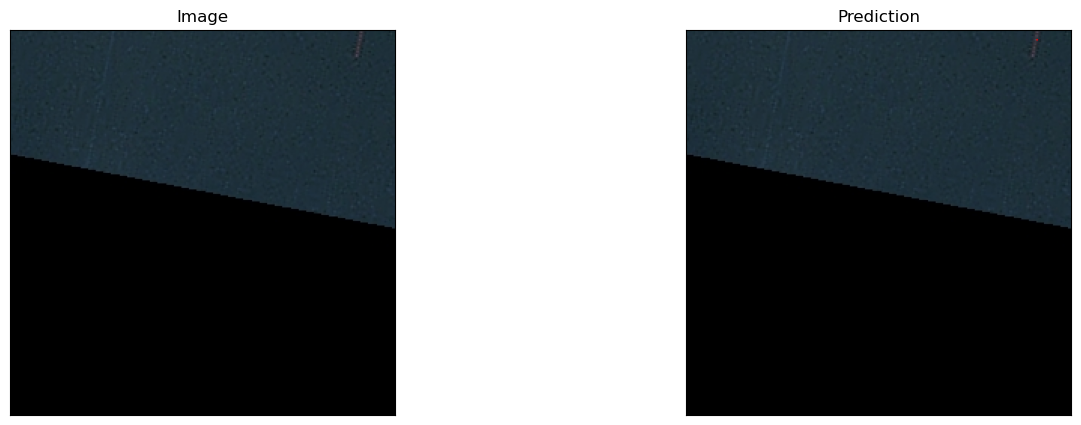

tile_23_7.jpg


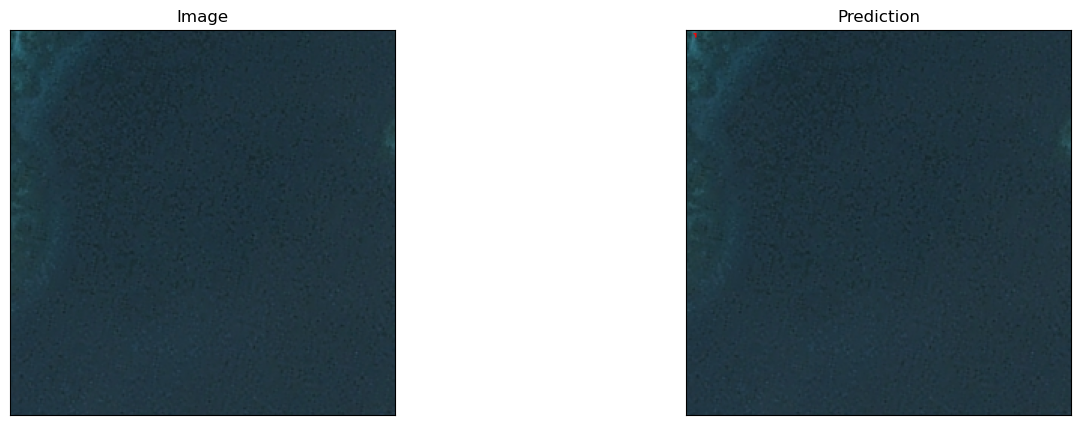

tile_24_6.jpg


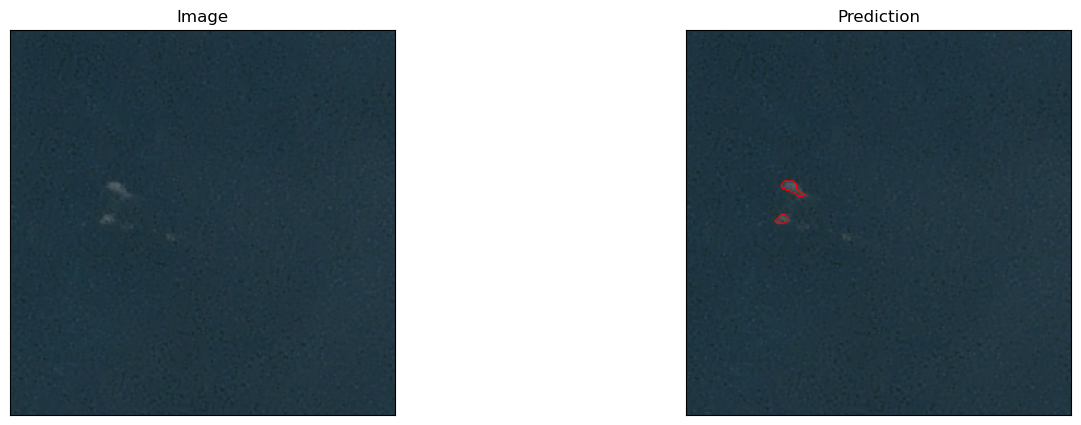

tile_24_7.jpg


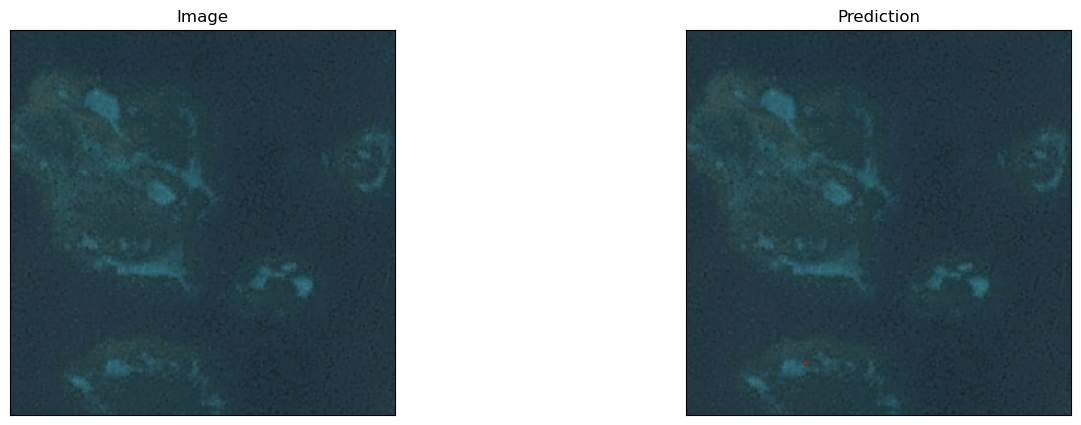

tile_3_4.jpg


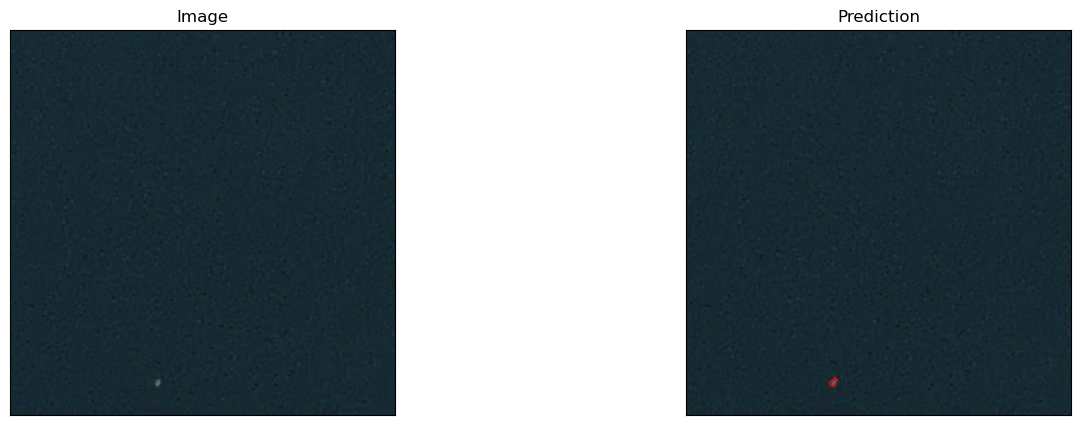

tile_9_3.jpg


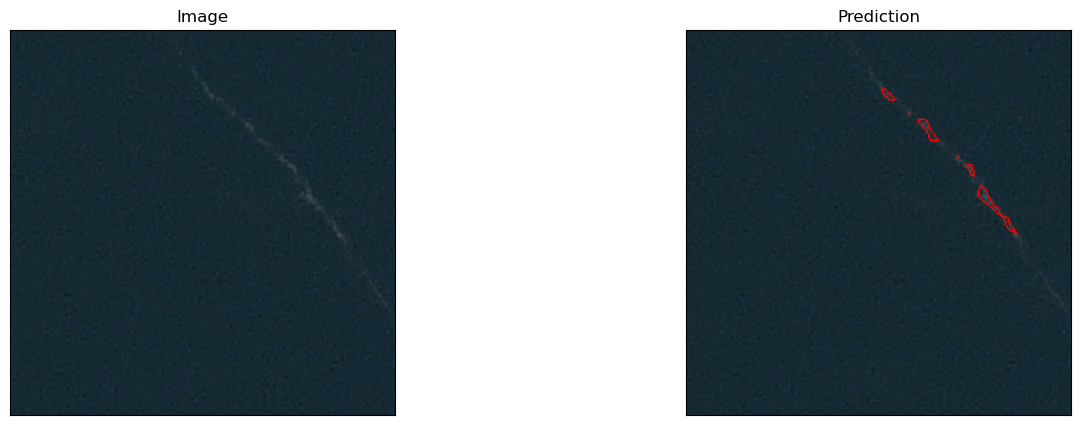

tile_30_10.jpg


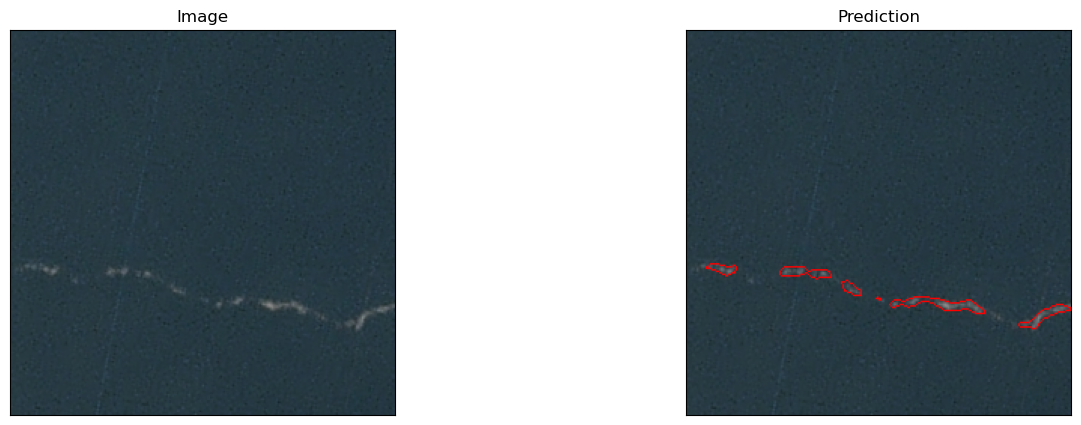

tile_4_0.jpg


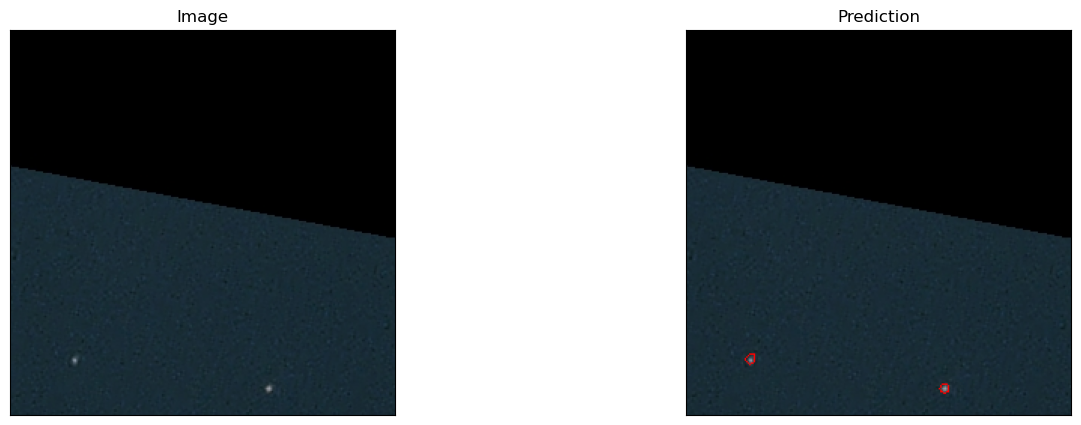

In [8]:
model.process_predictions(results_list=results_list)

In [9]:
for image in model_input:
    if "tile_24_7.jpg" in image["image_path"]:
        image = image
        break

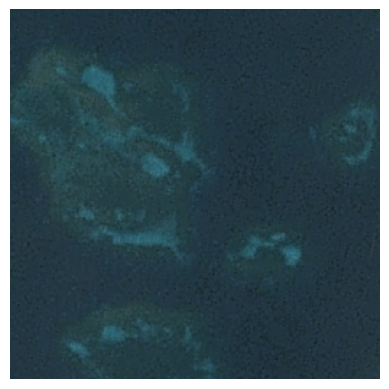

In [10]:
plt.imshow(image["image"])
plt.axis('off')  # Turn off the axis labels
plt.show()

In [11]:
input_image = np.expand_dims(image["image"], axis=0)
pr_mask = model.models_list[0].predict(input_image)

1/1 [==============================] - 0s 45ms/step


In [12]:
np.unique(pr_mask)

array([2.6351006e-05, 2.8951885e-05, 3.6045451e-05, ..., 5.0679165e-01,
       5.5642450e-01, 5.7527119e-01], dtype=float32)

In [13]:
pr_mask = np.where(pr_mask > 0.8, 255, 0)
pr_mask = pr_mask[..., 0].squeeze()

In [14]:
np.count_nonzero(pr_mask == 255)

0

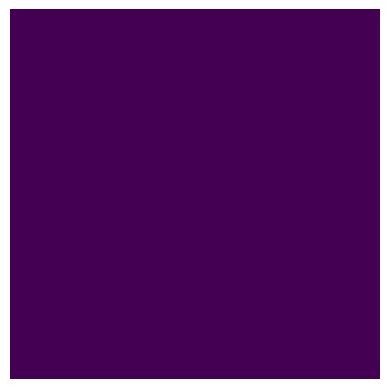

In [15]:
plt.imshow(pr_mask)
plt.axis('off')  # Turn off the axis labels
plt.show()

In [ ]:

pr_mask = np.where(pr_mask > 0, 255, pr_mask)
pr_mask = pr_mask[..., 0].squeeze()

In [11]:
false_samples = "D:/pythonProjects/final_project/Final_project/datasets/marine_debris_detection/marine_debris-semantic_segmentation/false_samples/"
for file in os.listdir(false_samples):
    import numpy as np
    if ".jpg" in file:

        # Create a NumPy array filled with zeros
        arr = np.zeros((256, 256))

        # Save the array as an .npy file
        file_path = false_samples+file[:-4] + '.npy'
        np.save(file_path, arr)

In [21]:
from skimage import io
for result in results_list:
    if result[2] == 1:
       file_path = result[3][:-4] + 'prediction.jpg'
       io.imsave(file_path, result[1])

C:\Users\AvivL\AppData\Local\Temp\ipykernel_10080\3540547940.py:5: UserWarning: D:/pythonProjects/final_project/Final_project/backend/data_utils/searches/2023-05-07_09-26-33.547604/20161008_153105_0e3a/tiles/tile_25_5/tile_25_5prediction.jpg is a low contrast image
  io.imsave(file_path, result[1])
C:\Users\AvivL\AppData\Local\Temp\ipykernel_10080\3540547940.py:5: UserWarning: D:/pythonProjects/final_project/Final_project/backend/data_utils/searches/2023-05-07_09-26-33.547604/20161008_153105_0e3a/tiles/tile_25_6/tile_25_6prediction.jpg is a low contrast image
  io.imsave(file_path, result[1])
C:\Users\AvivL\AppData\Local\Temp\ipykernel_10080\3540547940.py:5: UserWarning: D:/pythonProjects/final_project/Final_project/backend/data_utils/searches/2023-05-07_09-26-33.547604/20161008_153105_0e3a/tiles/tile_4_2/tile_4_2prediction.jpg is a low contrast image
  io.imsave(file_path, result[1])
C:\Users\AvivL\AppData\Local\Temp\ipykernel_10080\3540547940.py:5: UserWarning: D:/pythonProjects/fina

In [8]:
os.environ['CUDA_VISIBLE_DEVICES'] = '0'
model_input2 = data_load(
     "D:/pythonProjects/final_project/Final_project/backend/data_utils/searches/2023-05-06_20-01-03.773733")

In [9]:
len(model_input2)

1785

In [10]:
with tf.device('/GPU:0'):
    results_list2 = model.execute_job(input_data=model_input2)

1/1 [==============================] - 0s 42ms/step


In [11]:
len(results_list2)

1785

In [12]:
count = 0
for result in results_list2:
    if result[2] == 1:
        count+=1
print(count)

516


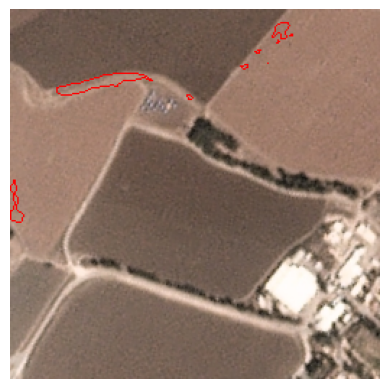

In [21]:
plt.imshow(results_list2[380][1])
plt.axis('off')  # Turn off the axis labels
plt.show()

In [26]:
input_image = np.expand_dims(results_list2[380][0], axis=0)
pr_mask = model.models_list[0].predict(input_image)

1/1 [==============================] - 0s 52ms/step


In [23]:
pr_mask

array([[[[5.5100475e-03],
         [1.8703946e-03],
         [4.9741538e-03],
         ...,
         [1.8817355e-03],
         [1.2115285e-03],
         [1.1476720e-02]],

        [[9.2914677e-04],
         [1.1499191e-04],
         [3.8810496e-04],
         ...,
         [9.1194874e-05],
         [2.5800569e-05],
         [6.0124509e-04]],

        [[9.7109395e-04],
         [7.2395174e-05],
         [2.5356992e-04],
         ...,
         [4.1309191e-05],
         [1.2592371e-05],
         [2.5471312e-04]],

        ...,

        [[6.2122411e-04],
         [1.5941956e-05],
         [1.6647580e-05],
         ...,
         [4.7685216e-06],
         [9.9524750e-06],
         [3.0510302e-04]],

        [[2.9423725e-04],
         [6.7141646e-06],
         [1.9327468e-05],
         ...,
         [1.3658802e-05],
         [1.3531665e-05],
         [3.8576889e-04]],

        [[6.1330036e-03],
         [2.3231241e-04],
         [6.8009045e-04],
         ...,
         [1.0755023e-03],
        

In [27]:
pr_mask = np.where(pr_mask > 0.999999, 255, 0)
pr_mask = pr_mask[..., 0].squeeze()

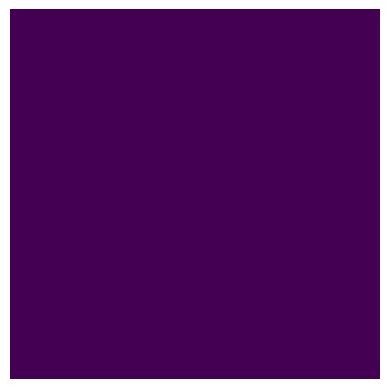

In [28]:
plt.imshow(pr_mask)
plt.axis('off')  # Turn off the axis labels
plt.show()

In [ ]:
model.process_predictions(results_list=results_list2)